# Example calculation of 95% confidence intervals
## Monthly mean 30yr average temperature climatology

The statistical and programming objective is: 

- Calculate long-term mean for the average temperatures years during the years 1951-1980 and 1991-2020:
    For each month: January, February, March , ... November, December

- For each monthly climatological mean determine the 95% confidence interval using the equations described in the reading assignment

- Summarize the results in one or two figures that allow us to observe changes in the mean climatologies.

### Please refer to the textbooks for the calculations steps involved in estimating the 95% confidence interval!
- Collaborative Statistics textbook Chapter 8.3 (p.337)
- Practical Statistics Book Chapter 2 Box 2.2 pages 18-19.


---

## 1. Code development

### 1.1 Import packages and function definitions

We define a supporting function that sends a request to the data server and gets the data. 

__The function returns two lists that we assign to the 'standard variables' x and y:__
- x contains the list with dates (type datetime)
- y the list with temperatures (type float)

We also import here all necessary packages. For the confidence interval calculation we make use the SciPy package stats.


(Note: This is a function similar to the previous version in which we downloaded GHCN daily temperature data from the ACIS server, but we did not go into the details earlier in this course. See unit4 notebook get_ghcn_daily_from_server_and _save_to_csv.ipynb, udated version available.)

In [1]:
# request a station time series
# from Applied Climate Information System
# http://www.rcc-acis.org/index.html
# Author: OET
# code designed for ATM315/ENV315 Python introduction

import numpy as np
import matplotlib.pyplot as plt
import urllib3
import json
import datetime as dt
import pandas as pd
# for confidence interval calculation
from scipy import  stats


#########################################################################################################
# function to get the monthly data from the server
#########################################################################################################
def get_stationdata_monthly(sid,var='avgt',startyear=2017,endyear=2017):
    """Sends request to regional climate center ACIS and gets monthly data for one station.
    Input parameters: 
        sid (string): a station id
        var (string): a variable name (e.g. 'avgt', 'mint', 'maxt')
    Keyword parameters:
        startyear and endyear (integers): for selecting the year range e.g. 1950 and 2017
    
    Returned objects:
        list with dates (datetime objects)
        list with the data 
    """    
    # the http address of the data server
    host="http://data.rcc-acis.org/StnData"
    # forming the query string for the host server
    sdate='&sdate='+str(startyear)+'-01-1'
    edate='&edate='+str(endyear)+'-12-31'
    query='?sid='+sid+'&'+sdate+'&'+edate+'&interval=mly&'\
    +'elems='+"mly_mean_"+var
    # try to connect and to get the requested data
    # in format ready to export to a csv file
    print (">send data request to "+host+query)
    print ("station id:",sid)
    print ("year range: %4d - %4d" % (startyear,endyear))
    print ("> still waiting for response ...")
    try:
        http= urllib3.PoolManager()
        response = http.request('GET',host+query)
        # convert json-string into dictionary
        content =  json.loads(response.data.decode('utf-8'))
        meta=content['meta']
        data=content['data']
        time=[]
        value=[]
        for item in data:
            #print (item)
            time.append(dt.datetime.strptime(item[0],"%Y-%m"))
            if (item[1]!='M'):
                value.append(float(item[1]))
            else:
                value.append(np.NAN)
    except Exception as e:
        print ("error occurred:", e)
        return
    print(">... done")
    return time,value

### 1.2 Main section: Downloading a single station data set (monthly mean data)

In [2]:
station_id="USW00014735"
varname="avgt"
x,y=get_stationdata_monthly(station_id,varname,startyear=1950,endyear=2021)

>send data request to http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=1950-01-1&&edate=2021-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00014735
year range: 1950 - 2021
> still waiting for response ...
>... done


In [3]:
df=pd.DataFrame()
startdate=x[0]
n=len(x)
df['time']=x # pd.Series(pd.date_range(startdate, freq="M",periods=n))
df['avgt']=y
df=df.set_index('time') # for better treatment of the time
df['year']=df.index.year
df['month']=df.index.month


### 1.3 Data analysis tasks

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 1: Take a look at the data frame df: What are the column names, what is in df.index, what is the first row?
<BR>
<BR>
</P>



In [ ]:
# your code


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 2: Plot the full time series of the average temperature
<BR>
<BR>
</P>

In [ ]:
# your code


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 3: Select the rows for two 30 climate periods: 1951-1980 and 1991-2020
<BR>
<BR>
</P>
    
Appy the query function to dataframe _df_ and assign the results to new variables and check with np.shape the dimensions and size of the data array. You should have 360 data left in the arrays. 

Tip: 
- Apply np.logical_and function and two Boolean array operations to the array x.
- For this make use of the *dt.datetime* function to define a reference date for comparison as shown in the code below:


In [ ]:
# check the results


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 4: For each of the two subsampled data frames with the 30 year climate periods, select the  only month (a) January and then (b) July and plot the time series, respectively.
    
<BR>
<BR>
</P>
    


In [10]:
# your code

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 5: Calculate the mean and standard deviation for each month for the second 30 year climatology
<BR>
<BR>
</P>
    
Follow the example code shown below, which does the calculation for the first 30-year climatology (using the  the first dataframe _dfc1_). Save the results in new variables!
    

In [ ]:
monthlist=['1','2','3','4','5','6', 
           '7','8','9','10','11','12']
monthstr=['Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec']

# process the first 30 year climate data frame
i=0
mon_mean1=[] # empty list
mon_stdev1=[] # empty list
dfwork=dfc1 
for mon in monthlist:
    dfhelp=dfwork.query("month == "+mon)
    data_column=dfhelp['avgt']
    data_array=data_column.values
    m=np.nanmean(data_array)
    s=np.nanstd(data_array)
    print (f"mean temperature for month {monthstr[i]}: {m:.2f} F, stdev= {s:.2f}")
    mon_mean1.append(m)
    mon_stdev1.append(s)
    i=i+1

mon_mean1=np.array(mon_mean1) # type conversion list to numpy array
mon_stdev1=np.array(mon_stdev1)


In [12]:
# your code for second 30 year climate data

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 6: Finally, get the 95% confidence range using supporting function 
    for the t-distribution from SciPy package stats 
<BR>
<BR>
</P>
    
Start with the first 30 year climatology.
    
For each month, you have to calculate the 95% CI. 
Review the example from the previous class activity. 
You will need to determine the sample size _n_, degrees of freedom _df_, alpha-value, call the scipy function _stats.t.interval(alpha,df)_. See the example code below. The resulting 
    2 x 12 CI values have to be stored in lists (numpy arrays).


In [ ]:
# example code
n=10
df=n-1
alpha=0.95 # for both samples
tint=np.array(stats.t.interval(alpha,df)) # function itself returns a lists
ystd=np.array([6,5,4,3,2,1,1,2,3,4,5,6])
cf=np.zeros(shape=[12,2])
for i in range(12):
    cf[i,:]=tint*ystd[i]/np.sqrt(n)
    print (i,cf[i,0],cf[i,1])
    i+=1

## 2. Summary of results 

<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 7: Present the climatologies in a graph or two that make it easy to see the differences between the two periods, and how much the confidence intervals overlap.
<BR>
<BR>
</P>
    
- Tip: Check the function plt.errorbar for showing the confidence intervals

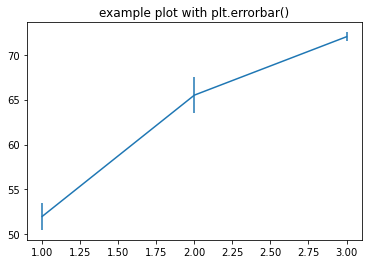

In [14]:
#Example code 
# help(plt.errorbar)
xtest=[1,2,3]
ytest=[52,65.5,72,]
ci=np.zeros([2,3])
ci=np.array([1.5,2,0.5])
# our CIs are symmetric around the mean
plt.errorbar(xtest,ytest,yerr=ci)
plt.title("example plot with plt.errorbar()")
plt.show()


In [15]:
# your code


<P style="background-color:purple;color:gold;font-size:130%">
<BR>
Task 8: Optional: Summary of the quantitavie results
<BR>
<BR>
</P>
    
Write all the results in form of a Pandas data frame and write the data frame to a local CSV file.

In [16]:
# optional code 

## 3 Summary and conclusion

Write here your summary and conclusions.

### 3.1 Changes in the mean temperatures

### 3.2 Significance of the changes based on the analysis of the confidence intervals

### Further References:
- Scipy stats package: 
    - support for [normal distribution](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
    - support for [t distribution](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html) (including confidence intervals)
- Matplotlib.pyplot 
    - [plt.errorbar examples](https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html) 
- [GHCND](https://www.ncdc.noaa.gov/ghcn-daily-description)
- FTP site with station ids etc: ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/